# Model Validation and Visuals

Import required libraries

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from plotnine import *

#gives ability to see all columns in a given dataframe
pd.set_option('display.max_columns', None)

Read in CleanedTeamData and gamedataXGBoostgridpredictionsallpca csvs

In [2]:
team = pd.read_csv("~/jupyter/capstone_Group10/data/CleanedTeamData.csv")
game = pd.read_csv("~/jupyter/capstone_Group10/data/gamedataXGBoostgridpredictionsallpca2020.csv")
game.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21817 entries, 0 to 21816
Columns: 122 entries, gamedatekey to margin
dtypes: float64(110), int64(2), object(10)
memory usage: 20.3+ MB


In [3]:
game.head()

,gamedatekey,season,date,location,winner,awayteam,hometeam,home_points,away_points,home_teamname_season,away_teamname_season,hometeam_adjem,hometeam_adj_o,hometeam_adj_d,hometeam_adj_t,hometeam_luck,hometeam_sos_adj_em,hometeam_sos_oppo,hometeam_sos_oppd,hometeam_ncsos_adj,hometeam_assist_percentage,hometeam_away_losses,hometeam_away_wins,hometeam_block_percentage,hometeam_conference,hometeam_conference_losses,hometeam_conference_wins,hometeam_effective_field_goal_percentage,hometeam_field_goal_percentage,hometeam_free_throw_attempt_rate,hometeam_free_throw_percentage,hometeam_free_throws_per_field_goal_attempt,hometeam_home_losses,hometeam_home_wins,hometeam_total_losses,hometeam_net_rating,hometeam_offensive_rating,hometeam_offensive_rebound_percentage,hometeam_opp_assist_percentage,hometeam_opp_block_percentage,hometeam_opp_effective_field_goal_percentage,hometeam_opp_field_goal_percentage,hometeam_opp_free_throw_attempt_rate,hometeam_opp_free_throw_percentage,hometeam_opp_free_throws_per_field_goal_attempt,hometeam_opp_offensive_rating,hometeam_opp_offensive_rebound_percentage,hometeam_opp_steal_percentage,hometeam_opp_three_point_attempt_rate,hometeam_opp_three_point_field_goal_percentage,hometeam_opp_total_rebound_percentage,hometeam_opp_true_shooting_percentage,hometeam_opp_turnover_percentage,hometeam_opp_two_point_field_goal_percentage,hometeam_pace,hometeam_simple_rating_system,hometeam_steal_percentage,hometeam_strength_of_schedule,hometeam_three_point_attempt_rate,hometeam_two_point_field_goal_percentage,hometeam_win_percentage,hometeam_total_wins,awayteam_adjem,awayteam_adj_o,awayteam_adj_d,awayteam_adj_t,awayteam_luck,awayteam_sos_adj_em,awayteam_sos_oppo,awayteam_sos_oppd,awayteam_ncsos_adj,awayteam_assist_percentage,awayteam_away_losses,awayteam_away_wins,awayteam_block_percentage,awayteam_conference,awayteam_conference_losses,awayteam_conference_wins,awayteam_effective_field_goal_percentage,awayteam_field_goal_percentage,awayteam_free_throw_attempt_rate,awayteam_free_throw_percentage,awayteam_free_throws_per_field_goal_attempt,awayteam_home_losses,awayteam_home_wins,awayteam_total_losses,awayteam_net_rating,awayteam_offensive_rating,awayteam_offensive_rebound_percentage,awayteam_opp_assist_percentage,awayteam_opp_block_percentage,awayteam_opp_effective_field_goal_percentage,awayteam_opp_field_goal_percentage,awayteam_opp_free_throw_attempt_rate,awayteam_opp_free_throw_percentage,awayteam_opp_free_throws_per_field_goal_attempt,awayteam_opp_offensive_rating,awayteam_opp_offensive_rebound_percentage,awayteam_opp_steal_percentage,awayteam_opp_three_point_attempt_rate,awayteam_opp_three_point_field_goal_percentage,awayteam_opp_total_rebound_percentage,awayteam_opp_true_shooting_percentage,awayteam_opp_turnover_percentage,awayteam_opp_two_point_field_goal_percentage,awayteam_pace,awayteam_simple_rating_system,awayteam_steal_percentage,awayteam_strength_of_schedule,awayteam_three_point_attempt_rate,awayteam_two_point_field_goal_percentage,awayteam_win_percentage,awayteam_total_wins,hometeam_dist,awayteam_dist,hometeam_seasonelo,awayteam_seasonelo,neutral,home_points_pred,away_points_pred,pred_margin,margin
0,2016-11-11-alabama,2017,11-Nov-16,"Coleman Coliseum , Tuscaloosa, Alabama",Home,COASTAL_CAROLINA,ALABAMA,70.0,53.0,ALABAMA_2017,COASTAL_CAROLINA_2017,13.08,105.3,92.2,65.1,-0.055,7.16,108.1,100.9,-1.64,48.2,6.0,5.0,11.6,sec,8.0,10.0,0.483,0.424,0.391,0.653,0.255,6.0,11.0,15.0,5.6,100.3,34.1,43.4,8.3,0.461,0.405,0.399,0.671,0.268,94.7,26.6,9.3,0.340,0.333,46.2,0.500,17.3,0.442,67.4,11.29,8.6,7.47,0.372,0.487,0.559,19.0,-3.56,101.8,105.4,68.8,0.050,-1.39,103.8,105.2,1.16,45.7,12.0,3.0,8.7,sun-belt,8.0,10.0,0.488,0.423,0.298,0.658,0.196,6.0,15.0,19.0,-0.8,101.7,31.0,52.3,9.0,0.496,0.417,0.320,0.707,0.226,102.5,26.1,8.3,0.468,0.336,48.0,0.529,14.8,0.489,71.0,-3.94,8.5,-1.48,0.399,0.484,0.513,20.0,0.0,792.896553,1541.968340,1483.221051,0.0,73.906261,59,14.906261,17.0
1,2016-11-11-alabama-birmingham,2017,11-Nov-16,"Bar

## Visuals - Predicted Margin

Below we can see a left skewed plot of the predicted margin variable in the game dataframe. As we can see, most of the predicted margins are below 10 points, with the median around 4.5-5 points.

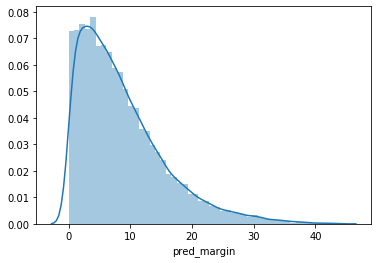

In [4]:
sns.distplot(game['pred_margin'])

Below we can see another left skewed plot with the actual margin of games. The median of actual margins is around the same as the predict plots

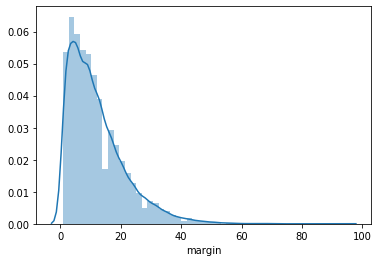

In [5]:
sns.distplot(game['margin'])

## Visuals - Home Points

We now see the plot of actual and predicted points scored by the home team to have a normal distribution with a median around 75 points.

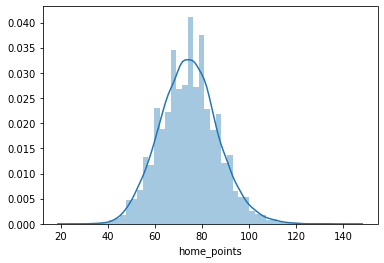

In [6]:
sns.distplot(game['home_points'])

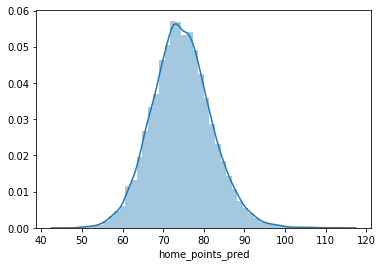

In [7]:
sns.distplot(game['home_points_pred'])

## Visuals - Away Points

We now see the plot of actual and predicted points scored by the away team to have a normal distribution with a median around 68 points.

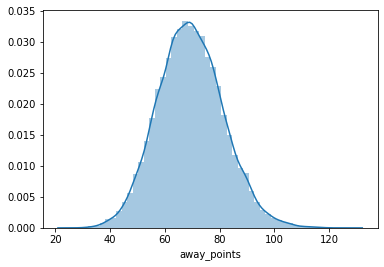

In [8]:
sns.distplot(game['away_points'])

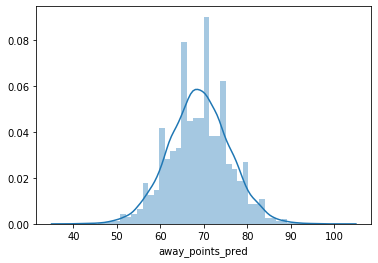

In [9]:
sns.distplot(game['away_points_pred'])

## Creating Bins for Actual vs. Predicted Scores

We now would like to check whether the difference (margin) between actual home points and predicted home points scored during a given game is within 10 points  

In [11]:
hcheck = [] 
for i,r in game.iterrows():
    act = r['home_points'] 
    pred =  round(r['home_points_pred'],0)
    if(abs(act-pred) <= 10):
        hcheck.append('yes')
    else: 
        hcheck.append('no')
game['homeWithin10'] =hcheck
game['homeWithin10'] = game['homeWithin10'].astype('category')

The following bins the difference (margin) between actual home points and predicted home points scored during a given game in the following buckets: 

- Zero
- Less Than 5
- Between 5-10
- Between 10-15
- Between 15-20
- More than 20

In [12]:
check = [] 
for i,r in game.iterrows():
    act = r['home_points'] 
    pred =  round(r['home_points_pred'],0)
    if(act-pred == 0):
         check.append('Zero')
    elif((abs(act-pred) <= 5) and  (abs(act-pred) > 0)):
        check.append('Less Than 5')
    elif((abs(act-pred) <= 10 ) and  (abs(act-pred) >= 5)):
        check.append('Between 5-10')
    elif((abs(act-pred) <= 15) and (abs(act-pred) >= 10)):
        check.append('Between 10-15')
    elif((abs(act-pred) <= 20 ) and  (abs(act-pred) >= 15)):
        check.append('Between 15-20')
    else: 
        check.append('More than 20')
game['home_Actual_vs_Predicted_scores_Margin'] =check
game['home_Actual_vs_Predicted_scores_Margin'] = game['home_Actual_vs_Predicted_scores_Margin'].astype('category')
game['home_Actual_vs_Predicted_scores_Margin'].cat.reorder_categories(['Zero', 'Less Than 5', 'Between 5-10', 'Between 10-15', 'Between 15-20','More than 20'],inplace=True)

We now would like to check whether the difference (margin) between actual away points and predicted away points scored during a given game is within 10 points  

In [13]:
acheck = [] 
for i,r in game.iterrows():
    act = r['away_points'] 
    pred =  round(r['away_points_pred'],0)
    if(abs(act-pred) <= 10):
        acheck.append(1)
    else: 
        acheck.append(0)
game['awayWithin10'] =acheck
game['awayWithin10'] = game['awayWithin10'].astype('category')

The following bins the difference (margin) between actual away points and predicted away points scored during a given game in the following buckets: 

- Zero
- Less Than 5
- Between 5-10
- Between 10-15
- Between 15-20
- More than 20

In [14]:
check = [] 
for i,r in game.iterrows():
    act = r['away_points'] 
    pred =  round(r['away_points_pred'],0)
    if(act-pred == 0 ):
         check.append('Zero')
    elif((abs(act-pred) <= 5) and  (abs(act-pred) > 0)):
        check.append('Less Than 5')
    elif((abs(act-pred) <= 10 ) and  (abs(act-pred) >= 5)):
        check.append('Between 5-10')
    elif((abs(act-pred) <= 15) and (abs(act-pred) >= 10)):
        check.append('Between 10-15')
    elif((abs(act-pred) <= 20 ) and  (abs(act-pred) >= 15)):
        check.append('Between 15-20')
    else: 
        check.append('More than 20')
game['away_Actual_vs_Predicted_scores_Margin'] =check
game['away_Actual_vs_Predicted_scores_Margin'] = game['away_Actual_vs_Predicted_scores_Margin'].astype('category')
game['away_Actual_vs_Predicted_scores_Margin'].cat.reorder_categories(['Zero', 'Less Than 5', 'Between 5-10', 'Between 10-15', 'Between 15-20','More than 20'],inplace=True)

### Plotting Actual vs. Predicted

#### Home plot

Per the plot below you can see the buckets placed in a colored scatterplot. You will see that pink values through the middle of the plot is where the actual vs predicted is spot on for the model. As the margin grows, the color of the points start to darken

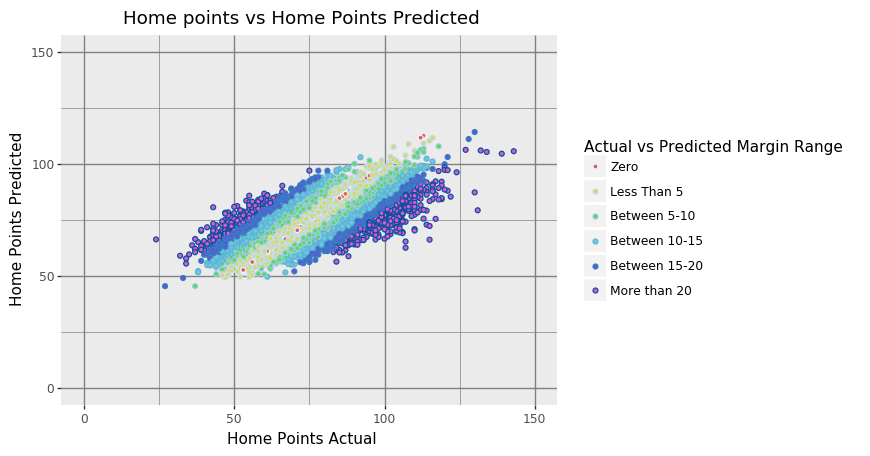

<ggplot: (-9223363284545943173)>

In [20]:
a = (ggplot(game) + 
    geom_point(aes(x= "home_points", y="home_points_pred",fill='home_Actual_vs_Predicted_scores_Margin',color='home_Actual_vs_Predicted_scores_Margin')) + labs(x="Home Points Actual",y="Home Points Predicted",title="Home points vs Home Points Predicted", color = "Actual vs Predicted Margin Range", fill="Actual vs Predicted Margin Range")) + scale_color_brewer(palette="Blues")
a = a + scale_x_continuous(limits = (0,150)) +scale_y_continuous(limits = (0, 150)) 
#+  scale_fill_manual(values=("red", "yellow","orange","green","blue","purple"))

a = a + theme( panel_grid=element_line(color='grey'))

a   


In [21]:
ggsave(plot=a, filename='Home Actual vs. Predicted Points.png', dpi=312,height=7, width=5, units = 'in')

/opt/conda/lib/python3.7/site-packages/plotnine/ggplot.py:729: PlotnineWarning: Saving 5 x 7 in image.
  from_inches(height, units), units), PlotnineWarning)
/opt/conda/lib/python3.7/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: Home Actual vs. Predicted Points.png
  warn('Filename: {}'.format(filename), PlotnineWarning)


We can see which games had spot on predictions. Based on some inspection we can see the model predicted more points playing against worse teams which is expected. Also we see alot of the games with higher predictions occured in the 2016 and 2017 seasons.

In [22]:
new = game[game['home_Actual_vs_Predicted_scores_Margin'] == "Zero" ]
new[['date','hometeam','awayteam','home_points_pred','home_points']].sort_values('home_points',ascending=False).head(20)

,date,hometeam,awayteam,home_points_pred,home_points
39,11-Nov-16,IOWA_STATE,SAVANNAH_STATE,112.754566,113.0
6526,28-Nov-17,WICHITA_STATE,SAVANNAH_STATE,111.854051,112.0
16740,5-Nov-19,GONZAGA,ALABAMA_STATE,94.861919,95.0
7489,22-Dec-17,VILLANOVA,HOFSTRA,95.396130,95.0
7385,20-Dec-17,NEVADA_LAS_VEGAS,MISSISSIPPI_VALLEY_STATE,95.222092,95.0
5596,10-Nov-17,ARKANSAS,SAMFORD,95.078119,95.0
6934,9-Dec-17,BUTLER,YOUNGSTOWN_STATE,94.602029,95.0
16115,6-Mar-19,MARSHALL,FLORIDA_INTERNATIONAL,93.850579,94.0
21,11-Nov-16,DUKE,MARIST,94.164144,94.0
1134,3-Dec-16,DUKE,MAINE,93.696050,94.0


#### Away plot

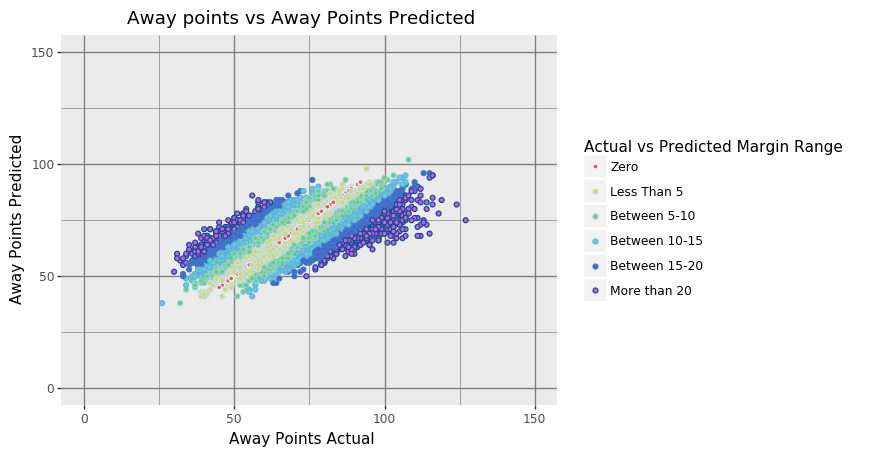

<ggplot: (-9223363284562354723)>

In [24]:
a = (ggplot(game, aes(x= "away_points", y="away_points_pred",fill='away_Actual_vs_Predicted_scores_Margin',color='away_Actual_vs_Predicted_scores_Margin')) + 
    geom_point() + labs(title="Away points vs Away Points Predicted",fill='Actual vs Predicted Margin Range',color="Actual vs Predicted Margin Range"))
a = a + scale_x_continuous(limits = (0, 150)) +scale_y_continuous(limits = (0, 150)) 
a = a + scale_color_brewer(palette="Blues") + theme( panel_grid=element_line(color='grey')) +  labs(x="Away Points Actual",y="Away Points Predicted",title="Away points vs Away Points Predicted")
a
#+ scale_fill_manual(values=("red", "yellow","orange","green","blue","purple"))


In [25]:
ggsave(plot=a, filename='Away Actual vs. Predicted Points.png', dpi=312,height=7, width=5, units = 'in')

/opt/conda/lib/python3.7/site-packages/plotnine/ggplot.py:729: PlotnineWarning: Saving 5 x 7 in image.
  from_inches(height, units), units), PlotnineWarning)
/opt/conda/lib/python3.7/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: Away Actual vs. Predicted Points.png
  warn('Filename: {}'.format(filename), PlotnineWarning)


We can see which away scores we predicted correctly. As noted before the predictions for away scores were lower than the Home model as only one of the correct predictions was greater than 90. 

In [26]:
new = game[game['away_Actual_vs_Predicted_scores_Margin'] == "Zero" ]
new[['date','awayteam','hometeam','away_points_pred','away_points']].sort_values('away_points',ascending=False).head(20)

,date,awayteam,hometeam,away_points_pred,away_points
10340,24-Feb-18,SAVANNAH_STATE,BETHUNE_COOKMAN,92,92.0
8218,11-Jan-18,MARSHALL,CHARLOTTE,91,91.0
2582,10-Jan-17,AKRON,CENTRAL_MICHIGAN,89,89.0
6073,19-Nov-17,AUBURN,HOFSTRA,89,89.0
838,26-Nov-16,CENTRAL_MICHIGAN,GREEN_BAY,89,89.0
8508,17-Jan-18,VILLANOVA,GEORGETOWN,88,88.0
9689,10-Feb-18,FLORIDA_GULF_COAST,SOUTH_CAROLINA_UPSTATE,88,88.0
8126,8-Jan-18,SAVANNAH_STATE,MORGAN_STATE,88,88.0
3569,30-Jan-17,SAVANNAH_STATE,MARYLAND_EASTERN_SHORE,87,87.0
13123,29-Dec-18,BUFFALO,CANISIUS,87,87.0


#### Margin plot

a = (ggplot(game, aes(x= "margin", y="pred_margin",fill='mcheck')) + 
    geom_point() + labs(title="Margin vs Predicted Margin"))
a + scale_x_continuous(limits = (0, 100)) +scale_y_continuous(limits = (0, 60)) +theme_bw()


### Actual vs. Predicted Scores Box Plot:

#### Home:

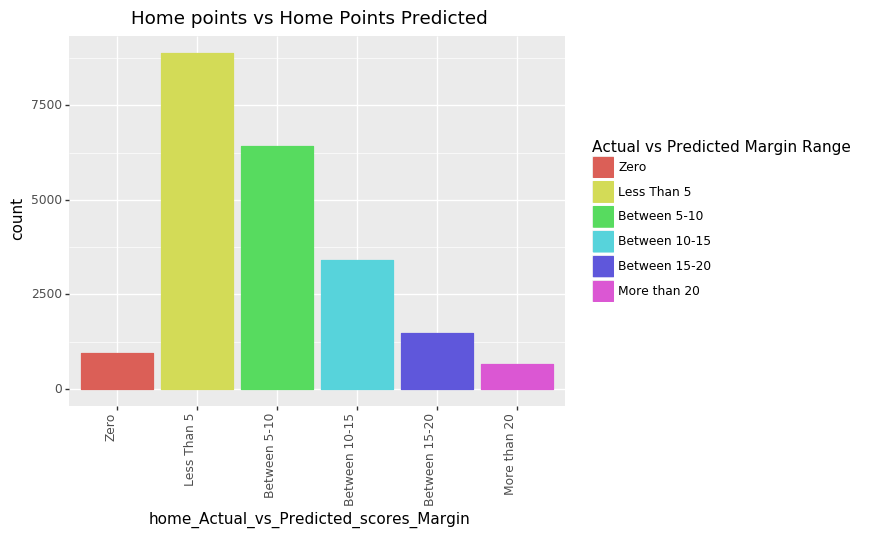

<ggplot: (8752309051712)>

In [38]:
a = (ggplot(game, aes(x= "home_Actual_vs_Predicted_scores_Margin", color="home_Actual_vs_Predicted_scores_Margin",fill="home_Actual_vs_Predicted_scores_Margin")) + 
    geom_bar() + labs(title="Home points vs Home Points Predicted",fill="Actual vs Predicted Margin Range",color="Actual vs Predicted Margin Range"))

a = a + theme(axis_text_x=element_text(rotation=90, hjust=1))
a

In [ ]:
ggsave(plot=a, filename='Bar Away Actual vs. Predicted Points.png', dpi=312,height=7, width=5, units = 'in')

#### Away 

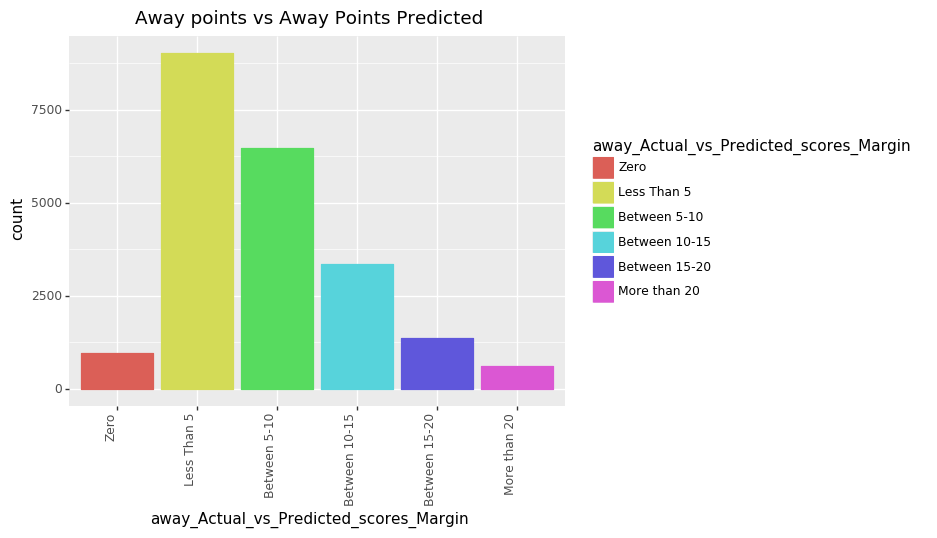

<ggplot: (-9223363300253005631)>

In [42]:
a = (ggplot(game, aes(x= "away_Actual_vs_Predicted_scores_Margin", color="away_Actual_vs_Predicted_scores_Margin",fill="away_Actual_vs_Predicted_scores_Margin")) + 
    geom_bar() + labs(title="Away points vs Away Points Predicted",fill="Actual vs Predicted Margin Range",color="Actual vs Predicted Margin Range"))

a = a + theme(axis_text_x=element_text(rotation=90, hjust=1))
a

In [43]:
game.to_csv(r'~/jupyter/capstone_Group10/data/gamedataXGBoostgridpredictionsallpca-analysis.csv', index = False)#saving cleaned data to csv for inspection